1. Cài tesseract.exe của Tesseract OCR. (Video hướng dẫn: https://youtu.be/p2wdxQzSks8?feature=shared )
- Link: https://drive.google.com/file/d/124y4dxdFiBfHT9lwLospLx8vc5NawiW7/view hoặc https://github.com/tesseract-ocr/tesseract lưu vào C:\Program Files\Tesseract-OCR





2. Cài tiếng việt: (Video hướng dẫn: https://youtu.be/pwu7cvtcdk0?feature=shared)
- Cách 1:
  - Step 1: Down data 
  https://github.com/tesseract-ocr/tessdata.git cho vào C:\Program Files\Tesseract-OCR
  - Step 2: Down gói ngôn ngữ :
  https://github.com/tesseract-ocr/langdata cho vào C:\Program Files\Tesseract-OCR
- Cách 2: Down phần đóng gói: Data + Gói ngôn ngữ (~100 lang)  + ảnh 1.3JPG: https://bit.ly/3psTHYX hoặc https://drive.google.com/file/d/11Hooe2i-l0bFWcFoIiCbmVheOdP6kn3b/view
    





3. Chú ý định dạng màu của các lib: cv2(OpenCV) và PIL (Pillow) - pytesseract(Tesseract-OCR) xài định dạng màu: BGR-RGB-RGB


# 0 . Test với ảnh văn bản:

In [2]:
!pip install pytesseract pillow

# Import lib
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from PIL import Image


In [4]:

# Đường dẫn đến hình ảnh
img = 'text1.jpg'
img = ''
image_path = rf'D:\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\MiniProjs-Research\MachineLearning&DeepLearning\Character Recognition\Model\datatestmodel\{img}'

# Mở hình ảnh và nhận dạng văn bản
img = Image.open(image_path)
text = pytesseract.image_to_string(img, lang='eng')  # Sử dụng 'vie' cho tiếng Việt
print(text)


My name's Thu Ha. T got married and had one daughter, I'm living in
Hoan Kiem District. I have 10 years experience in Marketing field and
T'm a group leader of GMC company. I'm friendly and kind to help other
people. I like dealing with difficult problems and challenged issues. I'm
rather serious in work and can work under high pressaure.



Văn bản tiếng việt

In [6]:
# Văn bản tiếng việt: 

# Đường dẫn đến hình ảnh
img = 'text1.jpg'
image_path = rf'D:\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\MiniProjs-Research\MachineLearning&DeepLearning\Character Recognition\Model\datatestmodel\{img}'

# Mở hình ảnh và nhận dạng văn bản
img = Image.open(image_path)
text = pytesseract.image_to_string(img, lang='eng')  # Sử dụng 'vie' cho tiếng Việt
# text = pytesseract.image_to_string(img, lang='vi')  # Sử dụng 'vie' cho tiếng Việt
print(text)




My name's Thu Ha. T got married and had one daughter, I'm living in
Hoan Kiem District. I have 10 years experience in Marketing field and
T'm a group leader of GMC company. I'm friendly and kind to help other
people. I like dealing with difficult problems and challenged issues. I'm
rather serious in work and can work under high pressaure.



# 1 . Test with signs

In [4]:
# Load image
img = 'sign1.jpg'
image_path = rf'D:\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\Data for Github\Data Sign Recognition Proj\{img}'
image = cv2.imread(image_path) 

# Sử dụng Tesseract OCR để nhận dạng văn bản từ ảnh
text = pytesseract.image_to_string(image, lang='vie')
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

print('Nội dung văn bản:', text)
print('Data:', data)


Nội dung văn bản:  

 

Data: {'level': [1, 2, 3, 4, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2], 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1], 'left': [0, 117, 117, 117, 117, 0, 0, 0, 0], 'top': [0, 305, 305, 305, 305, 0, 0, 0, 0], 'width': [499, 355, 355, 355, 355, 0, 0, 0, 0], 'height': [341, 7, 7, 7, 7, 341, 341, 341, 341], 'conf': [-1, -1, -1, -1, 95, -1, -1, -1, 95], 'text': ['', '', '', '', ' ', '', '', '', '']}


In [ ]:
# Vẽ các khung ô vuông vào ảnh gốc: 

image = cv2.imread(image_path)
height, width, _ = image.shape

boxes = pytesseract.image_to_boxes(image)
for box in boxes. splitlines(): 
    box = box.split(" ")
    img = cv2.rectangle(image, (int(box[1]), height - int(box[2])), (int(box[3]), height - int(box[4])), (0, 255, 0) )
cv2.imshow("img", img)
cv2.waitKey(0)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


<built-in method keys of dict object at 0x0000018F34AE44C0>


-1

In [ ]:
# Preprocess image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Recognize Vietnamese text using Tesseract
text = pytesseract.image_to_string(gray, lang='vie')

# Print recognized text
print(text)

In [ ]:
# Preprocess image (enhance contrast, reduce noise, convert to black and white)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Use Tesseract OCR to extract text from image
text = pytesseract.image_to_string(threshold_image, lang='vie')
confidence = pytesseract.image_to_data(threshold_image, output_type=pytesseract.Output.DICT)

print('Nội dung văn bản:', text)
print('Độ tin cậy:', confidence)


Nội dung văn bản:  

Độ tin cậy: {'level': [1, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1], 'left': [0, 7, 7, 7, 7], 'top': [0, 0, 0, 0, 0], 'width': [499, 486, 486, 486, 486], 'height': [341, 341, 341, 341, 341], 'conf': [-1, -1, -1, -1, 95], 'text': ['', '', '', '', '']}


### Update Model: 

In [ ]:
# Vẽ các khung ô vuông vào ảnh gốc: 
from pytesseract import Output

myconfig = r"--psm 11 --oem 3"

image = cv2.imread(image_path)
height, width, _ = image.shape

data = pytesseract.image_to_data(image, config=myconfig, output_type = Output.DICT)

print(data.keys)

amount_boxes =  len(data['text'])
for i in range(amount_boxes): 
    if float(data['conf'][i]) > 80: 
        (x, y, width, height) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        image = cv2.rectangle(img, (x, y), (x+width, y+height), (0, 255, 0), 2)
        image = cv2.putText(image, data['text'][i], (x, y+height+20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow("image", image)
cv2.waitKey(0)

In [ ]:
# Import necessary libraries
from matplotlib import pyplot as plt

# Load the uploaded image
image = cv2.imread(image_path)
ray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to enhance the text against its background
thresh_img = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Recognize text using Tesseract
text = pytesseract.image_to_string(thresh_img, lang='vie')
confidence = pytesseract.image_to_data(thresh_img, output_type=pytesseract.Output.DICT)['conf']

# Plotting the processed image and the original image side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(thresh_img, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Processed Image')

plt.tight_layout()
plt.show()

text, confidence



NameError: name 'gray_image' is not defined

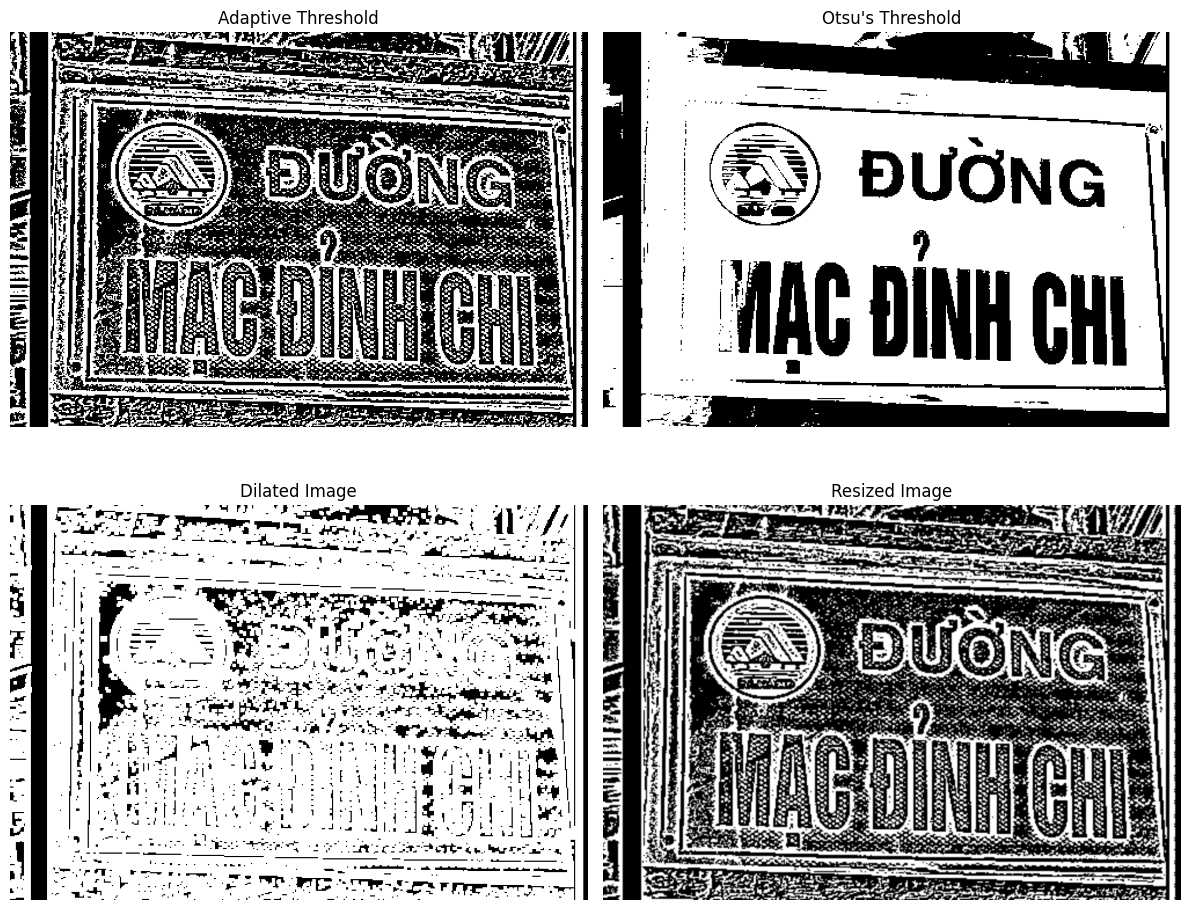

In [ ]:
# Apply different preprocessing techniques

# 1. Otsu's thresholding
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 2. Morphological operation - Dilation to amplify the text
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated_img = cv2.dilate(thresh_img, kernel, iterations=1)

# 3. Resizing image (sometimes enlarging the image can help in OCR)
resized_image = cv2.resize(thresh_img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Recognize text from the processed images
text_original = pytesseract.image_to_string(thresh_img)
text_otsu = pytesseract.image_to_string(otsu_thresh)
text_dilated = pytesseract.image_to_string(dilated_img)
text_resized = pytesseract.image_to_string(resized_image)

# Display the processed images and their OCR results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].imshow(thresh_img, cmap='gray')
ax[0, 0].set_title('Adaptive Threshold')
ax[0, 0].set_xlabel(f"OCR Result: {text_original}")
ax[0, 0].axis('off')

ax[0, 1].imshow(otsu_thresh, cmap='gray')
ax[0, 1].set_title("Otsu's Threshold")
ax[0, 1].set_xlabel(f"OCR Result: {text_otsu}")
ax[0, 1].axis('off')

ax[1, 0].imshow(dilated_img, cmap='gray')
ax[1, 0].set_title('Dilated Image')
ax[1, 0].set_xlabel(f"OCR Result: {text_dilated}")
ax[1, 0].axis('off')

ax[1, 1].imshow(resized_image, cmap='gray')
ax[1, 1].set_title('Resized Image')
ax[1, 1].set_xlabel(f"OCR Result: {text_resized}")
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import easyocr

# Load image
img = 'sign4.jpg'
image_path = rf'D:\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\Data for Github\Data Sign Recognition Proj\{img}'
image = cv2.imread(image_path)

# Tiền xử lý ảnh
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
dilated = cv2.dilate(edged, None, iterations=2)
eroded = cv2.erode(dilated, None, iterations=1)

# Sử dụng EasyOCR để nhận dạng văn bản từ ảnh
reader = easyocr.Reader(['vie']) # Chỉ định ngôn ngữ cần nhận dạng
result = reader.readtext(eroded)

# In kết quả
for bbox, text, score in result:
    print('Nội dung văn bản:', text)
    print('Độ tin cậy:', score)


ModuleNotFoundError: No module named 'easyocr'

# 2. easyocr   
Youtube - search theo date: https://www.youtube.com/watch?v=JQe6j2E-ByU

Github: https://github.com/JaidedAI/EasyOCR

'''pip install --user easyocr'''

In [5]:
import easyocr

# Load image
img = 'sign1.jpg'
image_path = rf'D:\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\Data for Github\Data Sign Recognition Proj\{img}'
image = cv2.imread(image_path) 

reader = easyocr.Reader(['vi']) # this needs to run only once to load the model into memory
# data_results = reader.readtext(image)
# print(data_results)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
text_results = reader.readtext(image, detail=0)
text_results=" ".join(text_results)
print(text_results)

ĐƯỜNG Iac D_k CH
